In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#separation of the dataset for training and testing
from sklearn.model_selection import train_test_split
#importing the algorithm for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#now determinig the accuracy for the model
from sklearn.metrics import accuracy_score


Data collection and preprocessing

In [3]:
#using the variable hd_data for accessing
hd_data=pd.read_csv('/Users/namanranka/Desktop/diagnosify/dataset/heart.csv')

In [4]:
hd_data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
hd_data.shape


(1025, 14)

In [6]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#checking the missing value
hd_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistics
hd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
hd_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
age_cp_mean=hd_data.groupby('age')['cp'].mean()

In [11]:
ages=age_cp_mean.index
cp_means=age_cp_mean.values

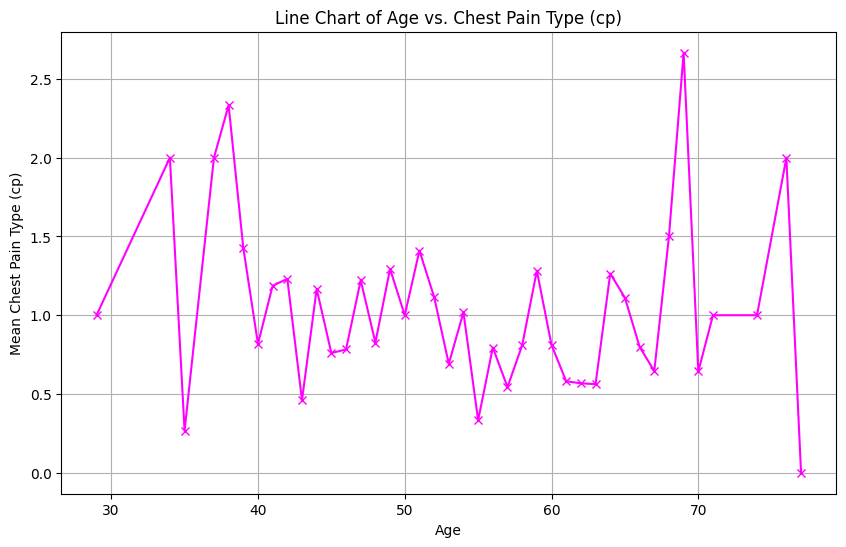

In [12]:
plt.figure(figsize=(10,6))
plt.plot(ages, cp_means, marker='x', linestyle='-',color='magenta')
plt.title('Line Chart of Age vs. Chest Pain Type (cp)')
plt.xlabel('Age')
plt.ylabel('Mean Chest Pain Type (cp)')
plt.grid(True)

In [13]:
plt.show()

In [14]:
corr_matrix=hd_data.corr()


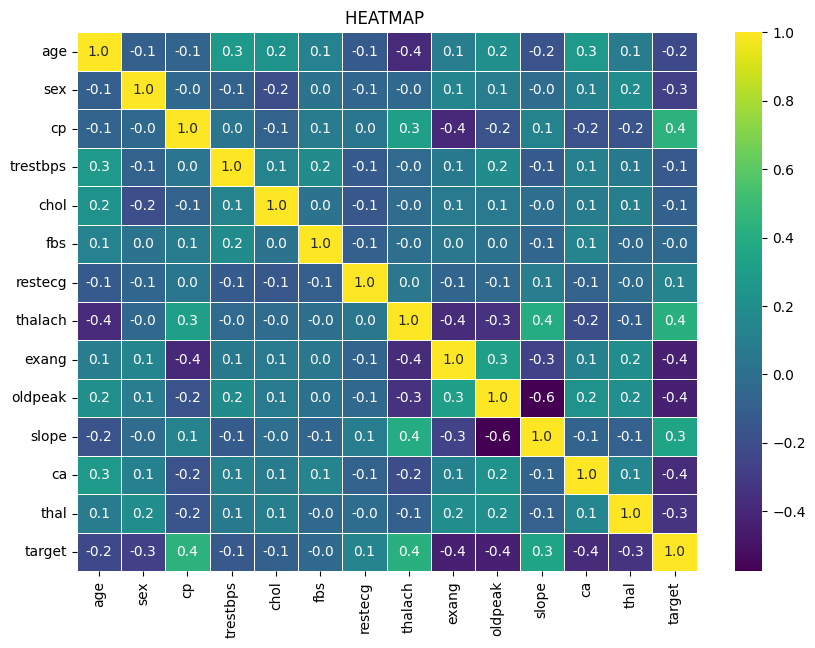

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True,cmap='viridis',fmt=".1f",linewidths=0.6)
plt.title('HEATMAP ')
plt.show()

In [16]:
trestbp=hd_data['trestbps']
chol=hd_data['chol']

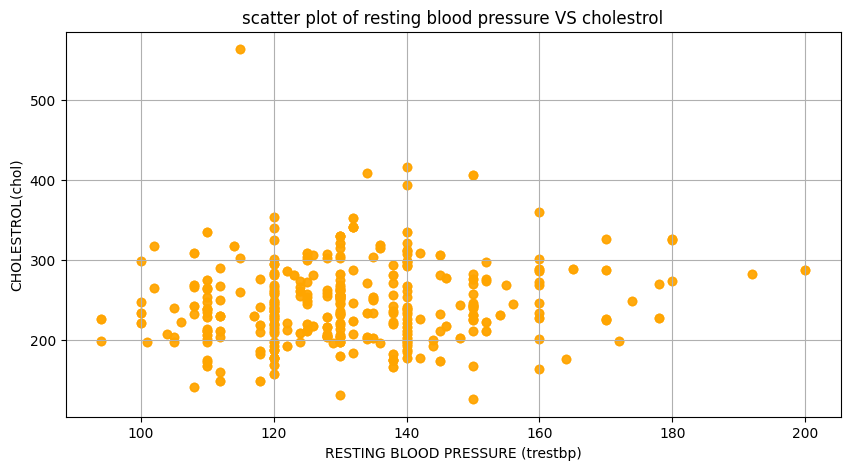

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(trestbp,chol,alpha=0.6,color='orange')
plt.title('scatter plot of resting blood pressure VS cholestrol')
plt.xlabel('RESTING BLOOD PRESSURE (trestbp)')
plt.ylabel('CHOLESTROL(chol)')
plt.grid(True)
plt.show()

SPLITTING THE DATA

In [18]:
hd_data['target'].value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [19]:
X=hd_data.drop('target',axis=1)
y=hd_data['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [22]:
print(X.shape,X_train.shape,X_test.shape,X_val.shape)

(1025, 13) (738, 13) (205, 13) (82, 13)


MODEL TRAINING
using logistic regression for binary classification


In [23]:
model=LogisticRegression()
model.fit(X_train,y_train)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# accuracy on training
X_train_predic=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predic,y_train)

In [38]:
print("accuracy: ", training_data_accuracy*(100))

accuracy:  86.1788617886179


In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_training_accuracy = random_forest_model.score(X_train, y_train)
random_forest_testing_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest:")
print("Training Accuracy:", random_forest_training_accuracy)
print("Testing Accuracy:", random_forest_testing_accuracy)


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366


In [42]:
import pickle

# Save the Random Forest model
with open('Random_Forest_Model.sav', 'wb') as file:
    pickle.dump(random_forest_model, file)



validating the system


building the predictive system


In [29]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_data_numpy=np.asarray(input_data)

ip_Data_reshaping=input_data_numpy.reshape(1,-1)

prediction=model.predict(ip_Data_reshaping)
print(prediction)



if(prediction[0]==0):
    print("The person doesn not have a heart disease!")
else:
    print("The person has a high chance of having heart disease ")

[1]
The person has a high chance of having heart disease 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
import pickle
filename='Heart_disease_model.sav'
pickle.dump(model,open(filename,'wb'))